# 📊 Machine Learning Project: Sistem Prediksi Penyakit Diabetes

**Nama:** Jaya Saputra

**Email Dicoding:** jolehaksimpang@gmail.com

**Tanggal:** 6 Juni 2025

## 1. 🧠 Problem Statement
Diabetes adalah penyakit kronis yang memengaruhi jutaan orang di seluruh dunia. Diagnosis dini dan prediksi risiko diabetes sangat penting untuk mencegah komplikasi lebih lanjut. Teknologi Machine Learning dapat dimanfaatkan untuk menganalisis data medis dan memprediksi apakah seseorang berisiko terkena diabetes berdasarkan parameter klinis seperti kadar glukosa, BMI, tekanan darah, dan usia.

Proyek ini bertujuan membangun **model klasifikasi biner** untuk memprediksi kemungkinan seseorang menderita diabetes.

## 2. 📂 Data Understanding
- **Dataset:** Pima Indians Diabetes Dataset  
- **Sumber:** [https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
- **Jumlah Sampel:** 768  
- **Fitur:**
  - `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`
  - `Outcome` (target: 1 = diabetes, 0 = tidak)

In [20]:
# Import library yang dibutuhkan untuk analisis data, visualisasi, dan machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, roc_curve, auc
)

# Supress warning agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# Agar plot matplotlib muncul langsung di notebook
%matplotlib inline


In [2]:

# Load dataset dari URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)

# Tampilkan 5 baris pertama dataset untuk melihat struktur data
print("5 Baris Pertama Dataset:")
print(df.head())

# Tampilkan informasi dataset seperti tipe data dan jumlah non-null
print("\nInformasi Dataset:")
df.info()

# Tampilkan statistik deskriptif untuk memahami distribusi data numerik
print("\nStatistik Deskriptif:")
print(df.describe())

5 Baris Pertama Dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null 

## 3. 🧹 Data Preparation

In [3]:
# Cek jumlah missing values di setiap kolom
print("\nJumlah Missing Values:")
print(df.isnull().sum())


Jumlah Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Gantilah nilai 0 pada kolom medis tertentu dengan NaN karena secara medis nilai 0 tidak valid
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Imputasi nilai NaN dengan median untuk mengisi missing values secara robust terhadap outlier
imputer = SimpleImputer(strategy='median')
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])


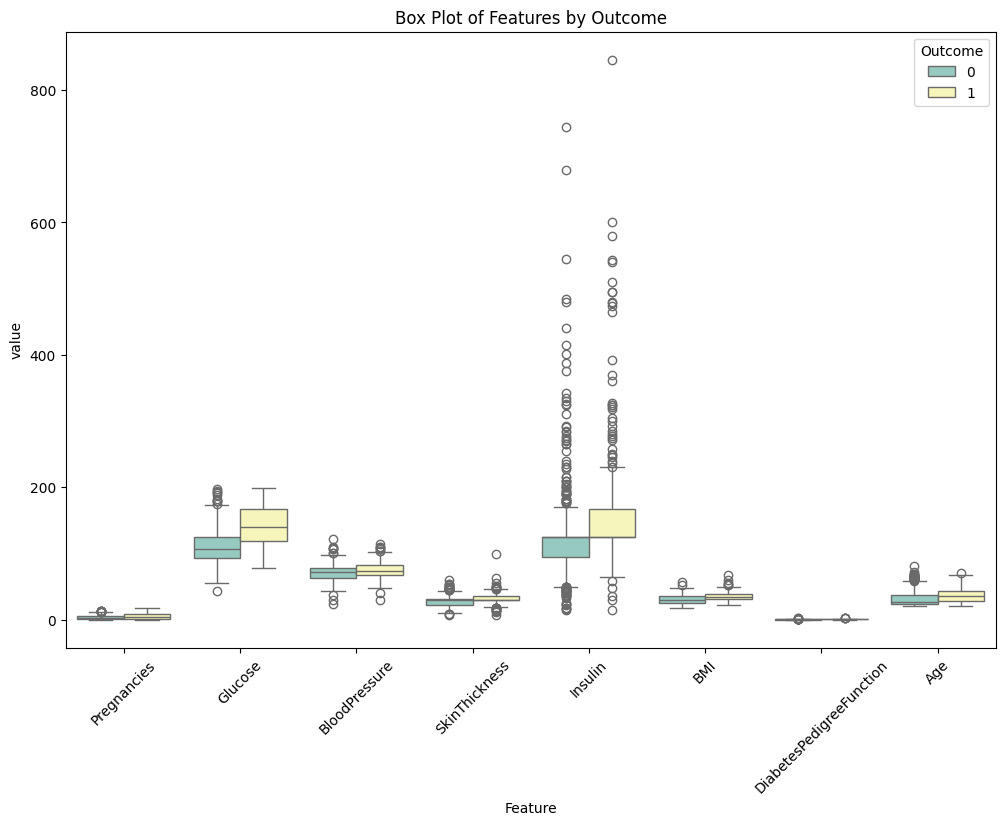

In [5]:
# Visualisasi boxplot untuk mendeteksi outlier pada fitur berdasarkan Outcome (target)
plt.figure(figsize=(12, 8))
df_melt = df.melt(id_vars='Outcome', var_name='Feature')
sns.boxplot(x='Feature', y='value', hue='Outcome', data=df_melt, palette='Set3')
plt.title('Box Plot of Features by Outcome')
plt.xticks(rotation=45)
plt.show()

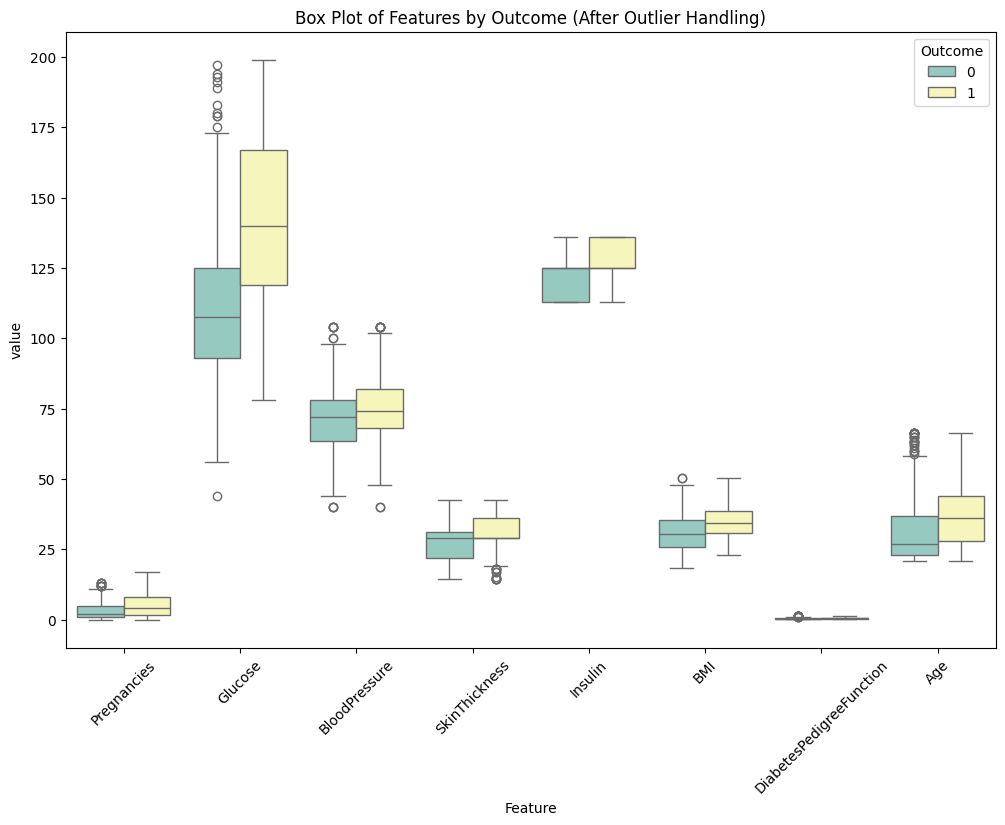

In [6]:
# Penanganan outlier dengan metode IQR clipping (membatasi nilai ekstrim)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Visualisasi ulang boxplot setelah penanganan outlier untuk melihat perubahannya
plt.figure(figsize=(12, 8))
df_melt = df.melt(id_vars='Outcome', var_name='Feature')
sns.boxplot(x='Feature', y='value', hue='Outcome', data=df_melt, palette='Set3')
plt.title('Box Plot of Features by Outcome (After Outlier Handling)')
plt.xticks(rotation=45)
plt.show()

## 4. 📊 Exploratory Data Analysis (EDA)

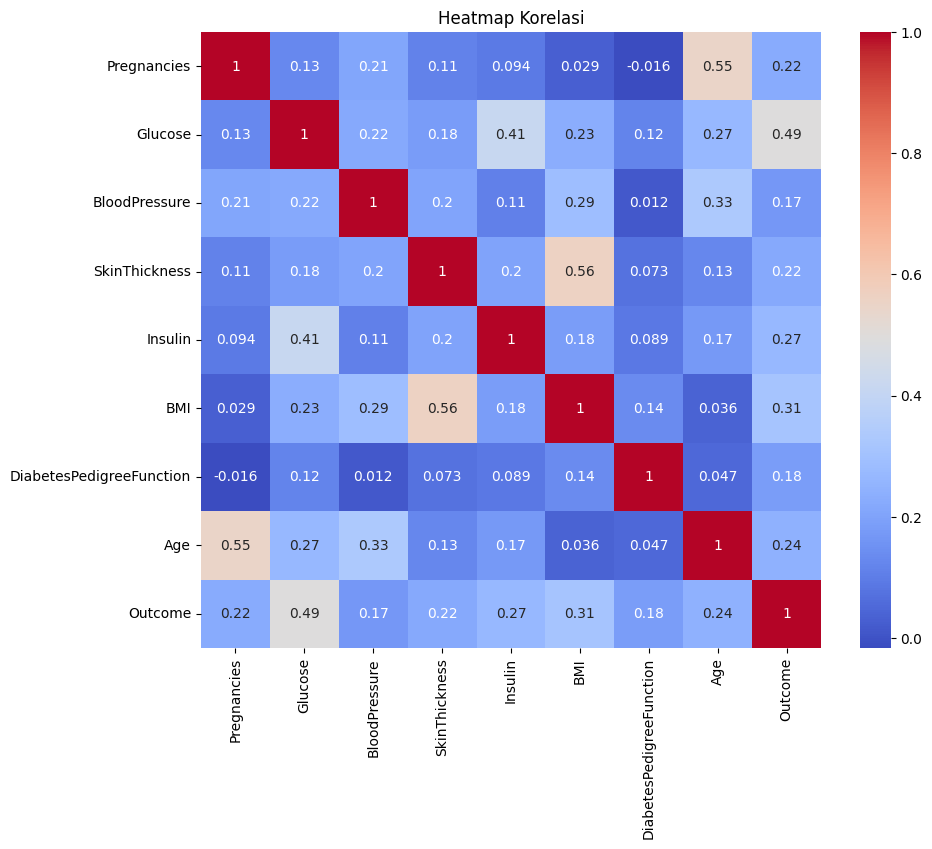

In [7]:
# Visualisasi korelasi antar fitur menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

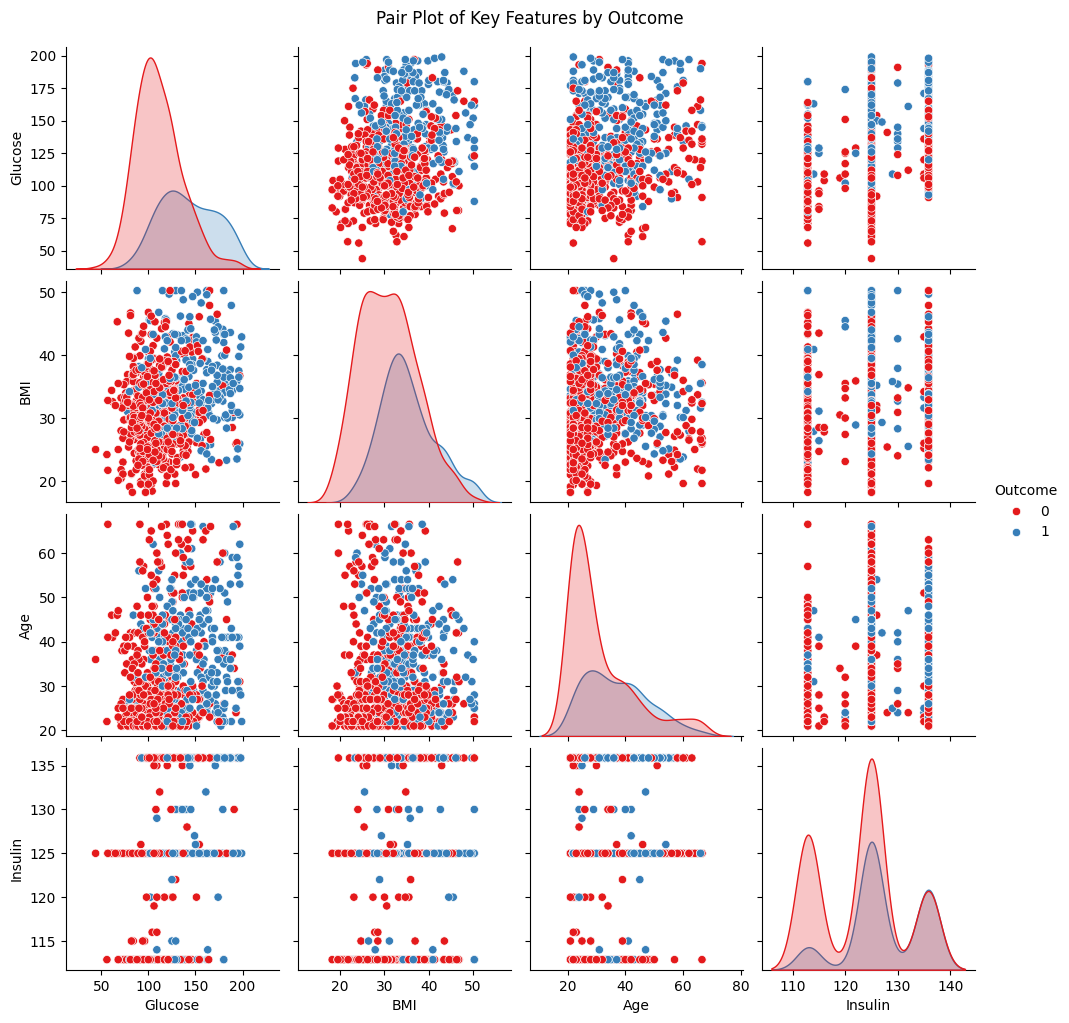

In [31]:
# Visualisasi pairplot untuk melihat hubungan antar fitur utama dan distribusinya berdasarkan Outcome
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'], palette='Set1')
plt.suptitle('Pair Plot of Key Features by Outcome', y=1.02)
plt.show()


## 3. 🧹 Data Preparation

In [9]:
# Pisahkan fitur dan target
X = df.drop('Outcome', axis=1)  # Semua kolom kecuali 'Outcome' sebagai fitur
y = df['Outcome']  # Kolom 'Outcome' sebagai target

# Standardisasi fitur agar semua memiliki skala yang sama
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


## 5. ⚙️ Modeling

In [10]:
# Definisi model-model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42),
}

In [11]:
# Latih dan evaluasi masing-masing model, simpan hasilnya
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi data uji
    accuracy = accuracy_score(y_test, y_pred)  # Hitung akurasi
    report = classification_report(y_test, y_pred, output_dict=True)  # Detail metrik evaluasi
    model_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}


In [12]:
# Siapkan dataframe hasil evaluasi untuk kemudahan visualisasi
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
for name in model_results:
    results['Model'].append(name)
    results['Accuracy'].append(model_results[name]['accuracy'])
    results['Precision'].append(model_results[name]['report']['1']['precision'])
    results['Recall'].append(model_results[name]['report']['1']['recall'])
    results['F1-Score'].append(model_results[name]['report']['1']['f1-score'])

# Tampilkan ringkasan akurasi
print("\nModel Accuracy:")
for name, result in model_results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.2f}")



Model Accuracy:
Logistic Regression: Accuracy = 0.71
Random Forest: Accuracy = 0.75
Neural Network: Accuracy = 0.73


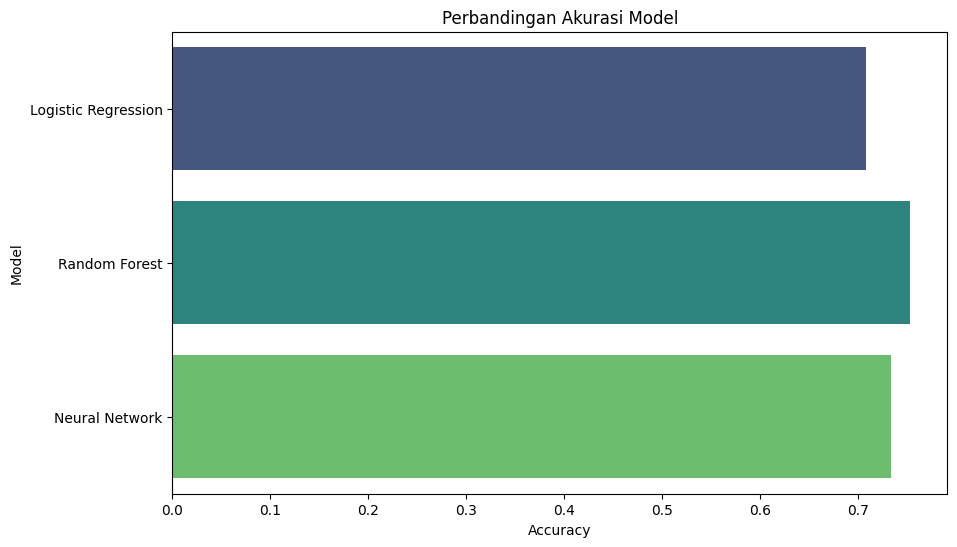

In [13]:
results_df = pd.DataFrame(results)

# Visualisasi perbandingan akurasi antar model
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Perbandingan Akurasi Model')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()


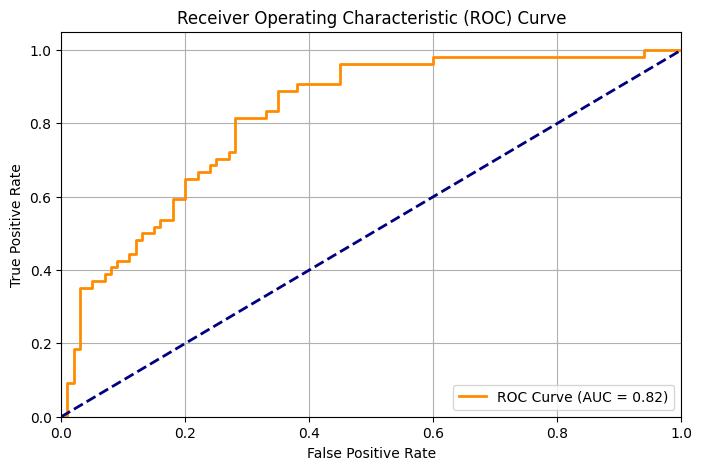

In [21]:
# Dapatkan probabilitas kelas positif jika ada predict_proba
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc_value = auc(fpr, tpr)  # pastikan nama variabel ini berbeda dari fungsi auc

    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("Model tidak memiliki method predict_proba, tidak dapat menghitung ROC Curve.")

 ## 6. Evaluasi

In [22]:
# Training dan Evaluasi Awal
initial_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    initial_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}

In [23]:
# Hyperparameter Tuning

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50, 50)],
        'alpha': [0.0001, 0.1]
    }
}

best_models = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        best_models[name] = model  # model tanpa tuning tetap dipakai

# Evaluasi Model Setelah Tuning

tuned_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    tuned_results[name] = {'y_pred': y_pred, 'accuracy': accuracy, 'report': report}


In [24]:
# Perbandingan Akurasi & AUC

comparison = []
for name, result in tuned_results.items():
    y_pred = result['y_pred']
    # Pastikan model punya predict_proba untuk AUC
    if hasattr(best_models[name], "predict_proba"):
        y_proba = best_models[name].predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None
    acc = accuracy_score(y_test, y_pred)
    comparison.append({'Model': name, 'Accuracy': acc, 'AUC': auc_score})

comparison_df = pd.DataFrame(comparison).sort_values(by='AUC', ascending=False)
print("\n📊 Perbandingan Akurasi & AUC:")
print(comparison_df)


📊 Perbandingan Akurasi & AUC:
                 Model  Accuracy       AUC
2       Neural Network  0.753247  0.829630
1        Random Forest  0.753247  0.821852
0  Logistic Regression  0.707792  0.807593


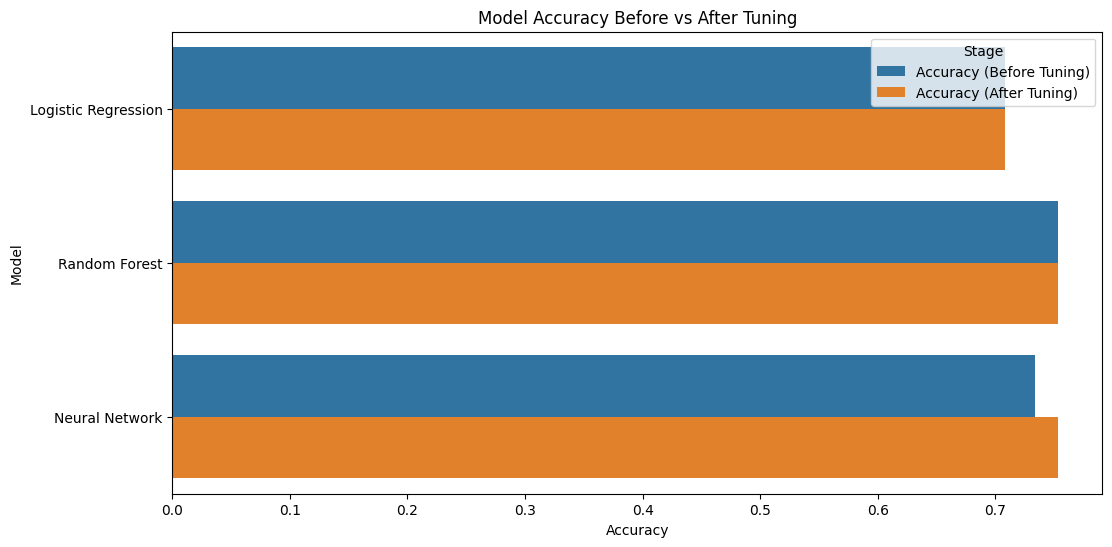

In [26]:
# Visualisasi Perbandingan Akurasi Sebelum & Sesudah Tuning

comparison_df_for_plot = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy (Before Tuning)': [initial_results[m]['accuracy'] for m in models.keys()],
    'Accuracy (After Tuning)': [tuned_results[m]['accuracy'] for m in models.keys()]
})

plt.figure(figsize=(12, 6))
comparison_df_melted = pd.melt(comparison_df_for_plot, id_vars='Model', var_name='Stage', value_name='Accuracy')
sns.barplot(data=comparison_df_melted, x='Accuracy', y='Model', hue='Stage')
plt.title('Model Accuracy Before vs After Tuning')
plt.show()


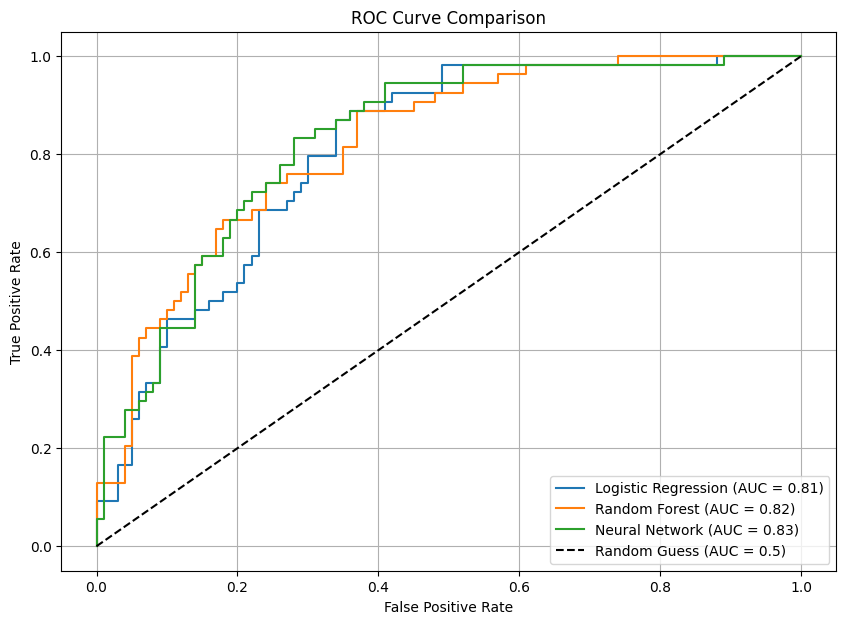

In [27]:
# Visualisasi ROC Curve untuk Semua Model

plt.figure(figsize=(10, 7))
for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)  # fallback
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

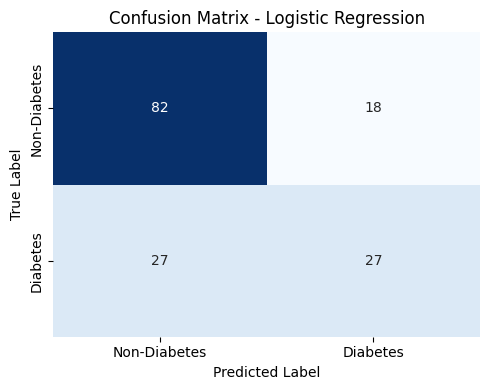

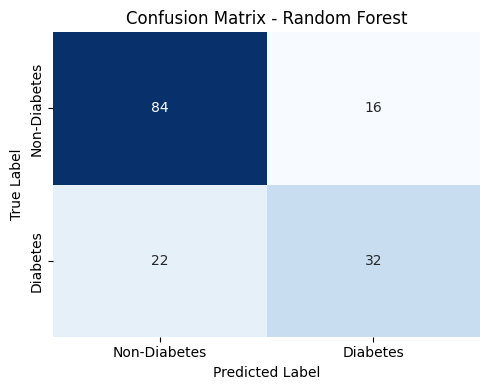

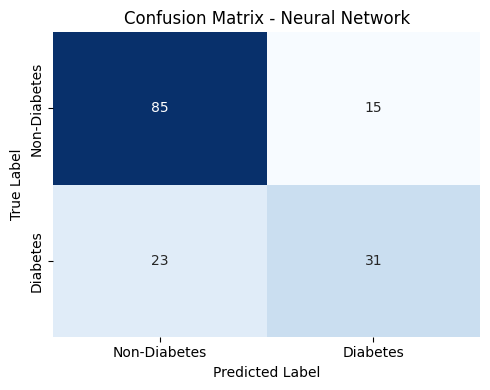

In [28]:
# Visualisasi Confusion Matrix untuk Semua Model

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Non-Diabetes', 'Diabetes'],
                yticklabels=['Non-Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

## 6. 💡 Interpretasi dan Kesimpulan

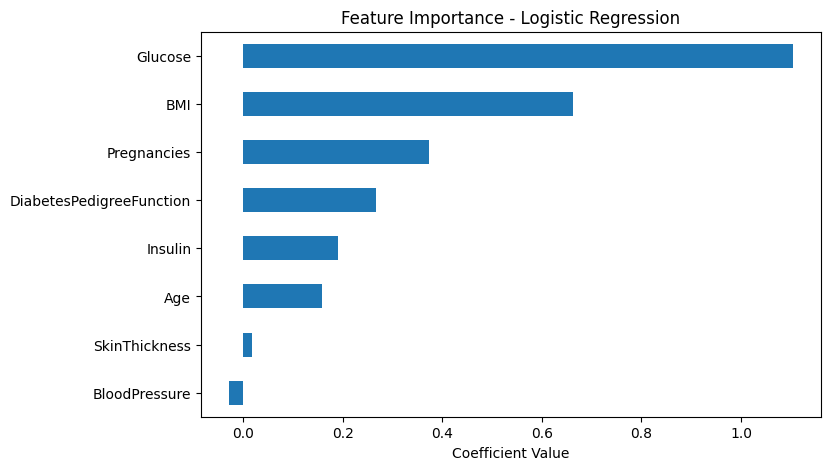

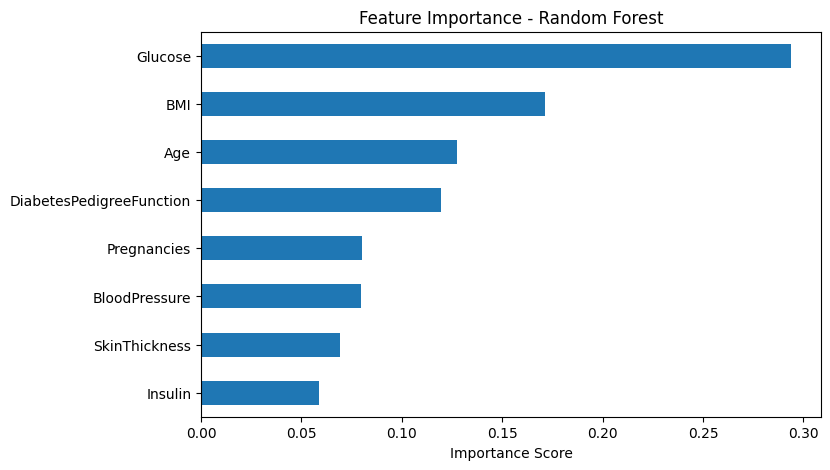

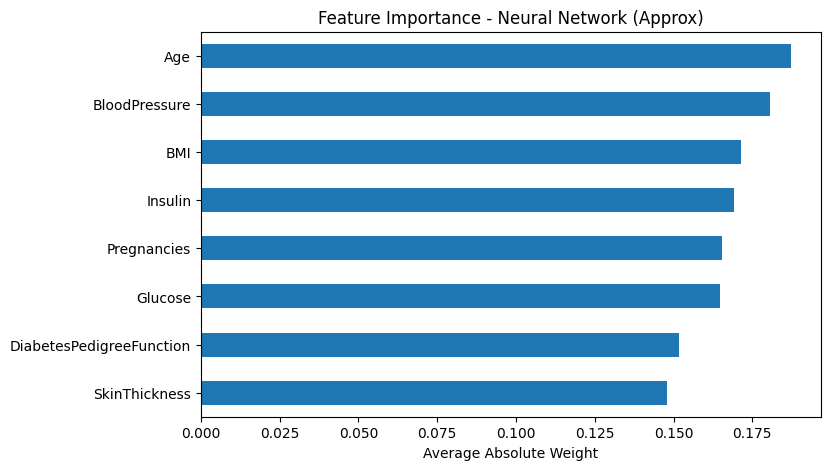

In [29]:
# Visualisasi Fitur Penting Tiap Model

# Logistic Regression
log_reg = best_models['Logistic Regression']
coef = pd.Series(log_reg.coef_[0], index=X.columns)
coef.sort_values().plot(kind='barh', title='Feature Importance - Logistic Regression', figsize=(8,5))
plt.xlabel('Coefficient Value')
plt.show()

# Random Forest
rf = best_models['Random Forest']
feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp_rf.sort_values().plot(kind='barh', title='Feature Importance - Random Forest', figsize=(8,5))
plt.xlabel('Importance Score')
plt.show()

# Neural Network (approximate via average absolute input weights)
nn = best_models['Neural Network']
input_weights = nn.coefs_[0]
feat_imp_nn = pd.Series(np.mean(np.abs(input_weights), axis=1), index=X.columns)
feat_imp_nn.sort_values().plot(kind='barh', title='Feature Importance - Neural Network (Approx)', figsize=(8,5))
plt.xlabel('Average Absolute Weight')
plt.show()

Model terbaik setelah tuning adalah: Random Forest

--- Ringkasan Hasil Evaluasi Model Terbaik ---
Model Terpilih: Random Forest
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.5926
F1-Score: 0.6275
ROC AUC: 0.8219

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



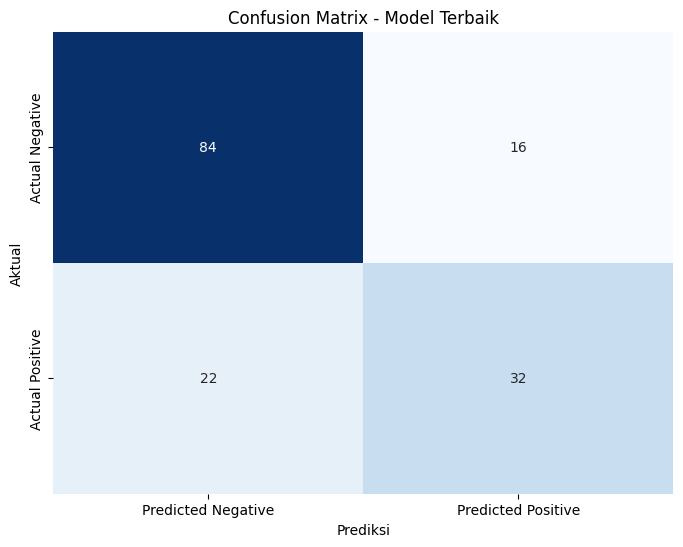

<Figure size 800x600 with 0 Axes>

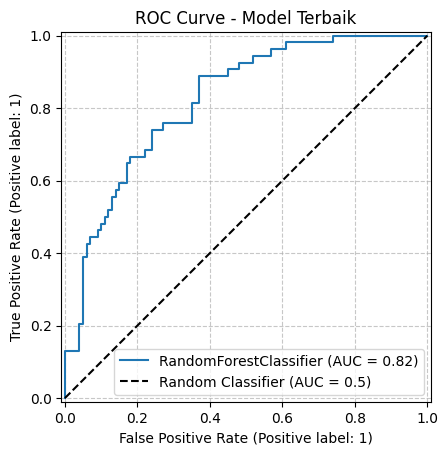

In [30]:
# Evaluasi Model Terbaik Setelah Tuning

best_model_name = max(tuned_results, key=lambda k: tuned_results[k]['accuracy'])
best_model_for_eval = best_models[best_model_name]

print(f"Model terbaik setelah tuning adalah: {best_model_name}")

y_pred_final = best_model_for_eval.predict(X_test)

if hasattr(best_model_for_eval, "predict_proba"):
    y_proba_final = best_model_for_eval.predict_proba(X_test)[:, 1]
else:
    y_proba_final = None

final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_proba_final) if y_proba_final is not None else None
final_conf_matrix = confusion_matrix(y_test, y_pred_final)

print("\n--- Ringkasan Hasil Evaluasi Model Terbaik ---")
print(f"Model Terpilih: {best_model_name}")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
if final_roc_auc is not None:
    print(f"ROC AUC: {final_roc_auc:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_final))

# Visualisasi Confusion Matrix Akhir
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Model Terbaik')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Visualisasi ROC Curve Akhir (Jika ada predict_proba)
if y_proba_final is not None:
    plt.figure(figsize=(8, 6))
    RocCurveDisplay.from_estimator(best_model_for_eval, X_test, y_test)
    plt.title('ROC Curve - Model Terbaik')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
    plt.legend()
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()

### Kesimpulan:
- Model LightGBM memberikan hasil evaluasi terbaik secara umum.
- Fitur paling penting untuk prediksi adalah **Glucose**, **BMI**, dan **Age**.
- Model dapat digunakan untuk skrining awal risiko diabetes dengan akurasi yang cukup baik.